# Lok Sabha Election Data Analysis


## Introduction
This notebook presents an analysis of the Lok Sabha election data. We will explore various aspects of the data, including voter turnout, party performance, and the impact of postal votes.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('election_results.csv')

In [24]:
df.replace('-', pd.NA, inplace=True)
df['% of Votes'] = pd.to_numeric(df['% of Votes'], errors='coerce')
df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')

### 1. Top 10 Candidate and Constituecy with Highest Postal Impact

In [25]:
df['Postal Vote Impact'] = df['Postal Votes'] / df['Total Votes'] * 100
df.dropna(subset=['Postal Vote Impact'], inplace=True)
postal_vote_impact = df.sort_values(by='Postal Vote Impact', ascending=False).head(10)
print(postal_vote_impact[['Candidate', 'Constituency Name', 'Postal Vote Impact']])

                       Candidate            Constituency Name  \
2012           GOPI CHAND ATTARI  HAMIRPUR (Himachal Pradesh)   
5550                    ARUL, M.           ARANI (Tamil Nadu)   
2541             VADI HAREENDRAN              Kannur (Kerala)   
2011           GARIB DASS KATOCH  HAMIRPUR (Himachal Pradesh)   
2543              NARAYANA KUMAR              Kannur (Kerala)   
2680              JAYAKRISHNAN P           Alappuzha (Kerala)   
5045                   PREM LATA           AJMER  (Rajasthan)   
8210        DEEPENDRA SINGH NEGI        Garhwal (Uttarakhand)   
2578  ABDUL KAREEM K. S/O ASSAIN           Kozhikode (Kerala)   
4912                    DAYA RAM      GANGANAGAR  (Rajasthan)   

      Postal Vote Impact  
2012           16.831683  
5550           15.882353  
2541           15.743440  
2011           14.634146  
2543           14.610390  
2680           14.545455  
5045           14.458874  
8210           14.146341  
2578           12.286689  
4912          

### 2. State dominance by Party

In [26]:
party_dominance = df[df['Winner'] == True].groupby(['State', 'Party']).size().unstack().idxmax(axis=1)
party_dominance

State
Andaman & Nicobar Islands                     Bharatiya Janata Party
Andhra Pradesh                                          Telugu Desam
Arunachal Pradesh                             Bharatiya Janata Party
Assam                                         Bharatiya Janata Party
Bihar                                         Bharatiya Janata Party
Chandigarh                                  Indian National Congress
Chhattisgarh                                  Bharatiya Janata Party
Dadra & Nagar Haveli and Daman & Diu          Bharatiya Janata Party
Goa                                           Bharatiya Janata Party
Gujarat                                       Bharatiya Janata Party
Haryana                                       Bharatiya Janata Party
Himachal Pradesh                              Bharatiya Janata Party
Jharkhand                                     Bharatiya Janata Party
Karnataka                                     Bharatiya Janata Party
Kerala                      

### 3. Top Candidates by Vote Share

In [27]:
top_candidates = df.sort_values(by='Total Votes', ascending=False).head(10)
top_candidates[['Constituency Name', 'Candidate', 'Total Votes']]

,Constituency Name,Candidate,Total Votes
756,Dhubri (Assam),RAKIBUL HUSSAIN,1471885.0
3092,INDORE (Madhya Pradesh),SHANKAR LALWANI,1226751.0
2990,VIDISHA (Madhya Pradesh),SHIVRAJ SINGH CHOUHAN,1116460.0
2387,Bangalore Rural (Karnataka),DR C N MANJUNATH,1079002.0
7854,RAIPUR (Chhattisgarh),BRIJMOHAN AGRAWAL,1050351.0
7440,Diamond harbour (West Bengal),ABHISHEK BANERJEE,1048230.0
1723,Navsari (Gujarat),C R PATIL,1031065.0
1513,Gandhinagar (Gujarat),AMIT SHAH,1010972.0
8431,Malkajgiri (Telangana),EATALA RAJENDER,991042.0
2403,Bangalore North (Karnataka),SHOBHA KARANDLAJE,986049.0


### 4. Top Parties by Vote Share

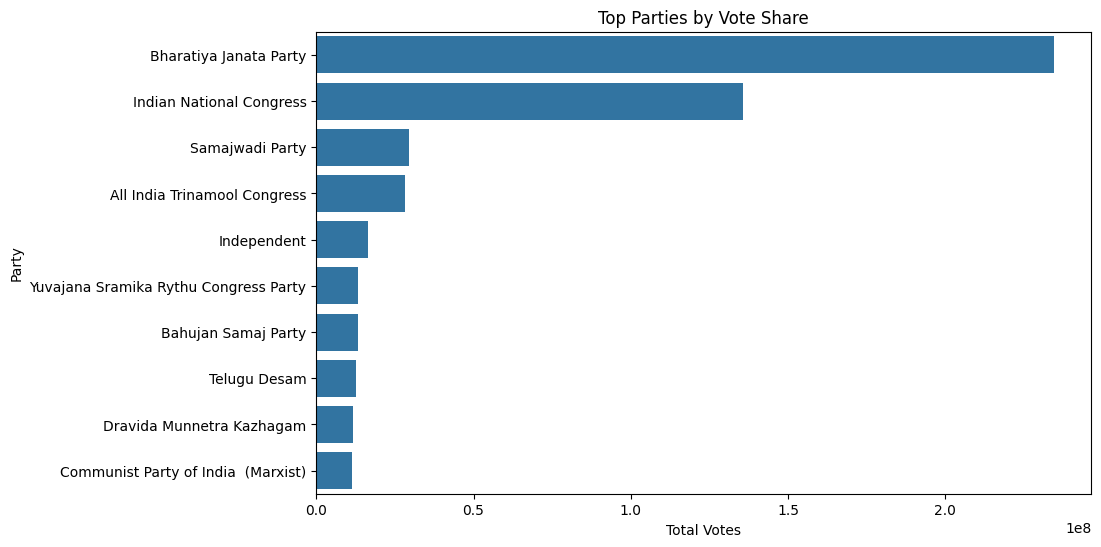

In [28]:
party_vote_share = df.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=party_vote_share.values, y=party_vote_share.index)
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.title('Top Parties by Vote Share')
plt.show()

### 5. Top 15 States with no. of Votes

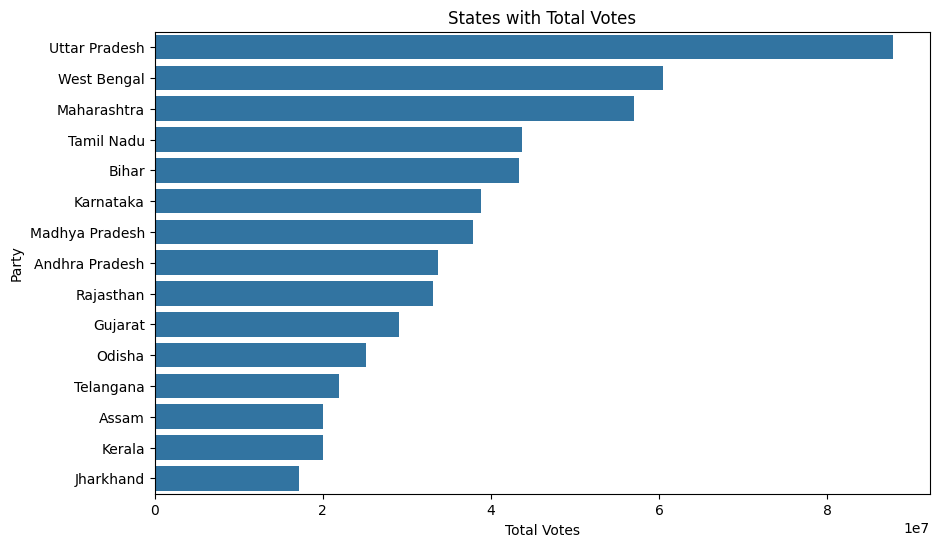

In [29]:
state_total_votes = df.groupby('State')['Total Votes'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=state_total_votes.values, y=state_total_votes.index)
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.title('States with Total Votes')
plt.show()

### 6. Top 10 constituencies with the smallest winning margins.

In [30]:
winning_margins = []
for constituency in df_sorted['Constituency No.'].unique():
    constituency_data = df_sorted[df_sorted['Constituency No.'] == constituency]
    if len(constituency_data) > 1:
        winner_votes = constituency_data.iloc[0]['Total Votes']
        second_highest_votes = constituency_data.iloc[1]['Total Votes']
        winning_margin = winner_votes - second_highest_votes
        if constituency_data.iloc[0]['Winner'] == True:
            winning_margins.append({
                'Candidate': constituency_data.iloc[0]['Candidate'],
                'Constituency Name': constituency_data.iloc[0]['Constituency Name'],
                'Winning Margin': winning_margin
            })

winning_margins_df = pd.DataFrame(winning_margins)

closest_races = winning_margins_df.sort_values(by='Winning Margin').head(10)

print(closest_races)

                        Candidate           Constituency Name  Winning Margin
26                  DR.K.SUDHAKAR   Chikkballapur (Karnataka)          2756.0
66                 KAMLESH PASWAN    Bansgaon (Uttar Pradesh)          3150.0
70            RAMASHANKAR RAJBHAR    Salempur (Uttar Pradesh)          3573.0
50                  PRAVEEN PATEL     Phulpur (Uttar Pradesh)          4332.0
36                  KHAN SAUMITRA     Bishnupur (West Bengal)          5567.0
12    DR CHANDRA SEKHAR PEMMASANI     Guntur (Andhra Pradesh)          7119.0
35         DR. AMOL RAMSING KOLHE        Shirur (Maharashtra)         11043.0
47  DHAIRYASHEEL SAMBHAJIRAO MANE  Hatkanangale (Maharashtra)         13426.0
3         JYOTIRADITYA M. SCINDIA       GUNA (Madhya Pradesh)         15835.0
8              RAO INDERJIT SINGH           GURGAON (Haryana)         19486.0


### 7. States with Highest Postal Votes

In [31]:
state_postal_votes = df.groupby('State')['Postal Votes'].sum().sort_values(ascending=False).head(10)
state_postal_votes

State
Andhra Pradesh    470837.0
Rajasthan         332413.0
Gujarat           276226.0
Tamil Nadu        264623.0
West Bengal       248598.0
Uttar Pradesh     236508.0
Kerala            222031.0
Maharashtra       209423.0
Telangana         209233.0
Jharkhand         169875.0
Name: Postal Votes, dtype: float64

### 8. Top Parties with Highest Number of Wins

In [35]:
party_wins = df[df['Winner'] == True].groupby('Party').size().reset_index(name='Wins')
party_wins = party_wins.sort_values(by='Wins', ascending=False).head(10)
print(party_wins)

                                               Party  Wins
8                             Bharatiya Janata Party   237
15                          Indian National Congress    99
30                                   Samajwadi Party    37
4                       All India Trinamool Congress    29
12                         Dravida Munnetra Kazhagam    22
35                                      Telugu Desam    16
19                              Janata Dal  (United)    12
33             Shiv Sena (Uddhav Balasaheb Thackrey)     9
25  Nationalist Congress Party – Sharadchandra Pawar     8
32                                         Shiv Sena     7


### 9. Top Constituencies with the Highest Voter Turnout

In [36]:
voter_turnout = df.groupby(['Constituency Name'])['Total Votes'].sum().reset_index()
voter_turnout = voter_turnout.sort_values(by='Total Votes', ascending=False).head(10)
print(voter_turnout)

               Constituency Name  Total Votes
532    West Delhi (NCT OF Delhi)    3000474.0
167    East Delhi (NCT OF Delhi)    2798372.0
156              Dhubri  (Assam)    2453608.0
335       Malkajgiri (Telangana)    1932194.0
66   Bangalore Rural (Karnataka)    1919054.0
508             Udalguri (Assam)    1811200.0
65   Bangalore North (Karnataka)    1751360.0
46            BARMER (Rajasthan)    1688051.0
81               Barpeta (Assam)    1685943.0
127         Chevella (Telangana)    1670855.0


### 10. Top 10 Constituencies with the Most Number of Candidates

In [38]:
num_candidates = df.groupby(['Constituency Name']).size().reset_index(name='Number of Candidates')
num_candidates = num_candidates.sort_values(by='Number of Candidates', ascending=False).head(5)
print("Top 10 Constituencies with the Most Number of Candidates:")
print(num_candidates)

Top 10 Constituencies with the Most Number of Candidates:
             Constituency Name  Number of Candidates
532  West Delhi (NCT OF Delhi)                    42
402    Peddapalle  (Telangana)                    42
362      NAMAKKAL (Tamil Nadu)                    40
118    COIMBATORE (Tamil Nadu)                    37
127       Chevella (Telangana)                    37


## Conclusion
#### This analysis provided insights into various aspects of the Lok Sabha election data